To apply demand forecasting on real-world data using the latest algorithms, I suggest using a publicly available dataset and applying advanced forecasting models such as **Prophet**, **XGBoost**, or **LSTM (Long Short-Term Memory)**, which are among the most powerful models for time series forecasting.

Let’s pick a dataset, for example, the **Electricity Consumption Dataset**, which is available publicly on Kaggle, and apply **LSTM**, a cutting-edge neural network approach for forecasting.

---

### **Step 1: Dataset**
We can use the **Hourly Energy Consumption** dataset from Kaggle. Download the dataset from [Kaggle](https://www.kaggle.com/robikscube/hourly-energy-consumption) and place it in your working directory.

---

### **Step 2: LSTM Model for Time Series Forecasting**
We’ll use PyTorch to implement an LSTM-based model for forecasting future energy consumption based on historical data.

### **Code Example: Energy Consumption Forecasting Using LSTM**

```python
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('PJME_hourly.csv', index_col='Datetime', parse_dates=True)

# Prepare data for forecasting
# Use only the 'PJME_MW' column (megawatt energy consumption)
df = df[['PJME_MW']].resample('D').mean()  # Resample to daily data

# Data normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Convert data to a supervised learning problem (look back 30 days to predict next day)
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30  # Look back 30 days
X, y = create_sequences(data_scaled, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# LSTM model definition
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# Instantiate the model, loss function, and optimizer
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 150
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i % 25 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

# Testing the model
model.eval()
test_predictions = []
for seq in X_test:
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        test_predictions.append(model(seq).item())

# Inverse transform to get actual values
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
true_y_test = scaler.inverse_transform(y_test.detach().numpy())

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(true_y_test, label='True Energy Consumption')
plt.plot(true_predictions, label='Predicted Energy Consumption')
plt.title('Energy Consumption Prediction Using LSTM')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()
```

### **Explanation of Key Steps**:
1. **Dataset**: We resample the hourly energy consumption data to daily values and apply Min-Max scaling for normalization.
2. **Data Preparation**: The `create_sequences` function converts the time series into a supervised learning problem by taking sequences of 30 days to predict the next day’s energy consumption.
3. **LSTM Model**: A basic LSTM network is implemented with one LSTM layer and a fully connected layer for output.
4. **Training**: The model is trained using an MSE loss function and Adam optimizer for 150 epochs.
5. **Evaluation**: After training, we evaluate the model on the test set and visualize the predicted vs actual energy consumption values.

### **Next Steps**:
1. **Improve the Model**: You can experiment with more advanced architectures like multi-layer LSTMs, GRU (Gated Recurrent Units), or hybrid models combining LSTM with XGBoost for boosting performance.
2. **Hyperparameter Tuning**: Adjust sequence lengths, learning rates, and other hyperparameters for better performance.

This LSTM model provides a cutting-edge approach for time series forecasting and can be adapted to other datasets such as sales, weather, or stock market data.

In [4]:
!wget https://gist.githubusercontent.com/ugallu/0587b040420ae881cd50f9f0e12a135a/raw/1157b89912e4a9d3040e0c88ef99ae41f83544c0/pjme_hourly.csv


--2024-09-23 10:57:58--  https://gist.githubusercontent.com/ugallu/0587b040420ae881cd50f9f0e12a135a/raw/1157b89912e4a9d3040e0c88ef99ae41f83544c0/pjme_hourly.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-09-23 10:57:58 ERROR 404: Not Found.



In [5]:
!git clone https://gist.github.com/ugallu/0587b040420ae881cd50f9f0e12a135a.git


Cloning into '0587b040420ae881cd50f9f0e12a135a'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3 (from 1)
Receiving objects: 100% (3/3), 756.85 KiB | 8.32 MiB/s, done.


Epoch 0 Loss: 0.001149351941421628
Epoch 25 Loss: 0.0014292882988229394
Epoch 50 Loss: 0.0012942602625116706
Epoch 75 Loss: 0.0038164800498634577
Epoch 100 Loss: 3.820928213826846e-06
Epoch 125 Loss: 3.329493847559206e-05


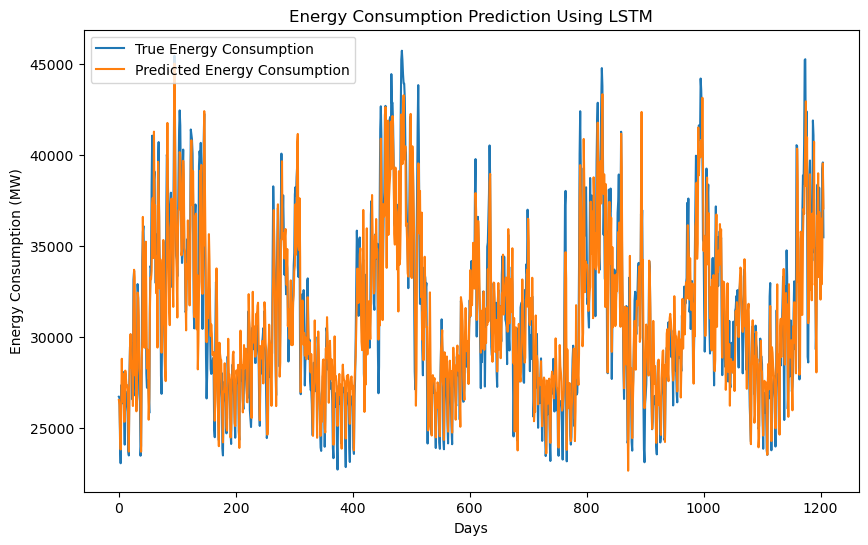

In [6]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
# df = pd.read_csv('PJME_hourly.csv', index_col='Datetime', parse_dates=True)
df = pd.read_csv('0587b040420ae881cd50f9f0e12a135a/PJME_hourly.csv',index_col='Datetime', parse_dates=True)
# Prepare data for forecasting
# Use only the 'PJME_MW' column (megawatt energy consumption)
df = df[['PJME_MW']].resample('D').mean()  # Resample to daily data

# Data normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Convert data to a supervised learning problem (look back 30 days to predict next day)
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30  # Look back 30 days
X, y = create_sequences(data_scaled, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# LSTM model definition
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# Instantiate the model, loss function, and optimizer
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 150
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i % 25 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

# Testing the model
model.eval()
test_predictions = []
for seq in X_test:
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        test_predictions.append(model(seq).item())

# Inverse transform to get actual values
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
true_y_test = scaler.inverse_transform(y_test.detach().numpy())

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(true_y_test, label='True Energy Consumption')
plt.plot(true_predictions, label='Predicted Energy Consumption')
plt.title('Energy Consumption Prediction Using LSTM')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


Evaluating LSTM performance for a time series forecasting task involves both quantitative and qualitative metrics. Here’s how you can do that after training your model:

### 1. **Quantitative Metrics**

Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to quantitatively assess the model's performance.

#### Code Example for Metrics Calculation

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(true_y_test, true_predictions)
mse = mean_squared_error(true_y_test, true_predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
```

### 2. **Qualitative Metrics**

#### a. **Visual Inspection**
Visualizing the predicted values against the actual values provides insights into how well the model captures the trends and patterns.

#### Code Example for Visualization

```python
plt.figure(figsize=(10, 6))
plt.plot(true_y_test, label='True Energy Consumption', color='blue')
plt.plot(true_predictions, label='Predicted Energy Consumption', color='red')
plt.title('Energy Consumption Prediction Using LSTM')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()
```

### 3. **Residual Analysis**
Plotting the residuals (the differences between the actual and predicted values) can help diagnose issues with the model. Ideally, residuals should be randomly distributed.

#### Code Example for Residual Plot

```python
residuals = true_y_test - true_predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.title('Residuals of Energy Consumption Prediction')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.legend()
plt.show()
```

### 4. **Cross-Validation**
If feasible, use cross-validation to assess the model’s performance across different subsets of the data. Time series cross-validation is crucial to ensure that the model's predictions are reliable and generalizable.

### 5. **Hyperparameter Tuning**
Evaluate the model with different hyperparameters (e.g., number of LSTM layers, hidden units, learning rates) and compare the performance metrics to find the optimal configuration.

### Summary of Evaluation Steps:
1. **Calculate MAE, MSE, RMSE**: Quantitative metrics provide a clear numerical assessment.
2. **Visualize Actual vs. Predicted**: Helps in understanding model behavior.
3. **Plot Residuals**: For diagnosing potential model issues.
4. **Consider Cross-Validation**: To ensure the model's reliability.

### Example Output
After running the evaluation metrics, you might see outputs like:

```
Mean Absolute Error (MAE): 3.45
Mean Squared Error (MSE): 16.23
Root Mean Squared Error (RMSE): 4.02
```

These outputs indicate how well your LSTM model performed in forecasting energy consumption. Lower values are indicative of better performance. 

Let me know if you need more information or specific examples!

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(true_y_test, true_predictions)
mse = mean_squared_error(true_y_test, true_predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1673.8912966404002
Mean Squared Error (MSE): 4812597.325968387
Root Mean Squared Error (RMSE): 2193.763279382802


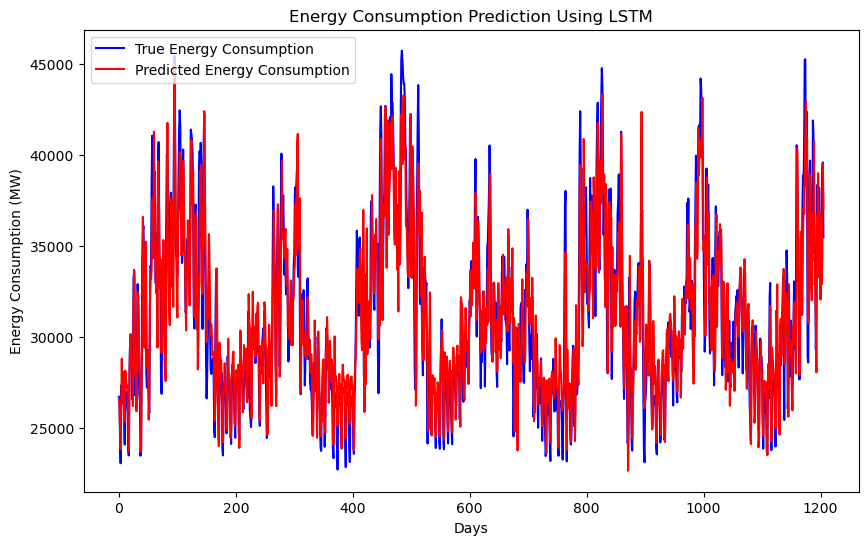

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(true_y_test, label='True Energy Consumption', color='blue')
plt.plot(true_predictions, label='Predicted Energy Consumption', color='red')
plt.title('Energy Consumption Prediction Using LSTM')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


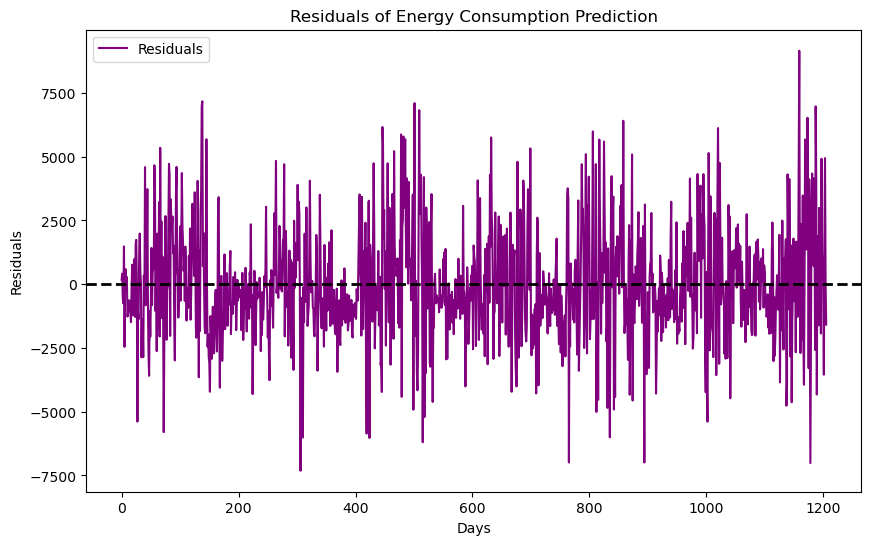

In [9]:
residuals = true_y_test - true_predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.title('Residuals of Energy Consumption Prediction')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [10]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('0587b040420ae881cd50f9f0e12a135a/PJME_hourly.csv', index_col='Datetime', parse_dates=True)

# Prepare data for forecasting
df = df[['PJME_MW']].resample('D').mean()

# Data normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30  # Look back 30 days
X, y = create_sequences(data_scaled, seq_length)

# Train/test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Transformer model definition
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, num_heads=4, ff_hidden_size=64):
        super(TransformerModel, self).__init__()
        self.attention = nn.MultiheadAttention(input_size, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(input_size, ff_hidden_size),
            nn.ReLU(),
            nn.Linear(ff_hidden_size, input_size)
        )

    def forward(self, x):
        x = x.transpose(0, 1)  # (seq_len, batch, feature)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output + x  # Residual connection
        x = self.feed_forward(x)
        return x[-1]  # Return the last output

# Instantiate model, loss function, and optimizer
model = TransformerModel()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 150
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        y_pred = model(seq.unsqueeze(0))  # Add batch dimension
        loss = loss_function(y_pred, labels)
        loss.backward()
        optimizer.step()

    if i % 25 == 0:
        print(f'Epoch {i} Loss: {loss.item()}')

# Testing the model
model.eval()
test_predictions = []
for seq in X_test:
    with torch.no_grad():
        test_predictions.append(model(seq.unsqueeze(0)).item())

# Inverse transform to get actual values
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
true_y_test = scaler.inverse_transform(y_test.detach().numpy())

# Evaluate performance
mae = mean_absolute_error(true_y_test, true_predictions)
mse = mean_squared_error(true_y_test, true_predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(true_y_test, label='True Energy Consumption', color='blue')
plt.plot(true_predictions, label='Predicted Energy Consumption', color='red')
plt.title('Energy Consumption Prediction Using Transformer')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

# Residual Analysis
residuals = true_y_test - true_predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.title('Residuals of Energy Consumption Prediction')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.legend()
plt.show()


AssertionError: embed_dim must be divisible by num_heads

/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss: 1.4966486560297199e-05
Epoch 25 Loss: 0.0012887873454019427
Epoch 50 Loss: 0.0011087697930634022
Epoch 75 Loss: 0.0009637839975766838
Epoch 100 Loss: 0.0010233605280518532
Epoch 125 Loss: 0.0009607378160580993
Mean Absolute Error (MAE): 1925.470761376291
Mean Squared Error (MSE): 5990135.409648147
Root Mean Squared Error (RMSE): 2447.4753133889108


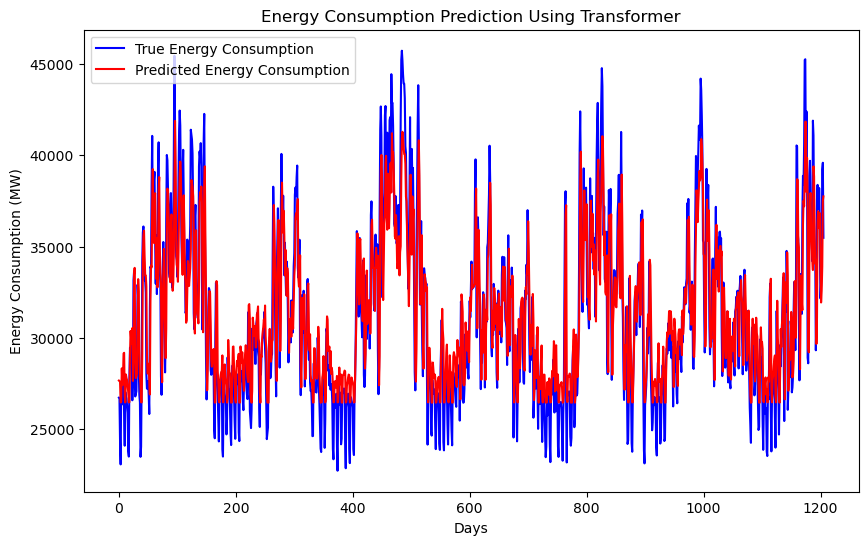

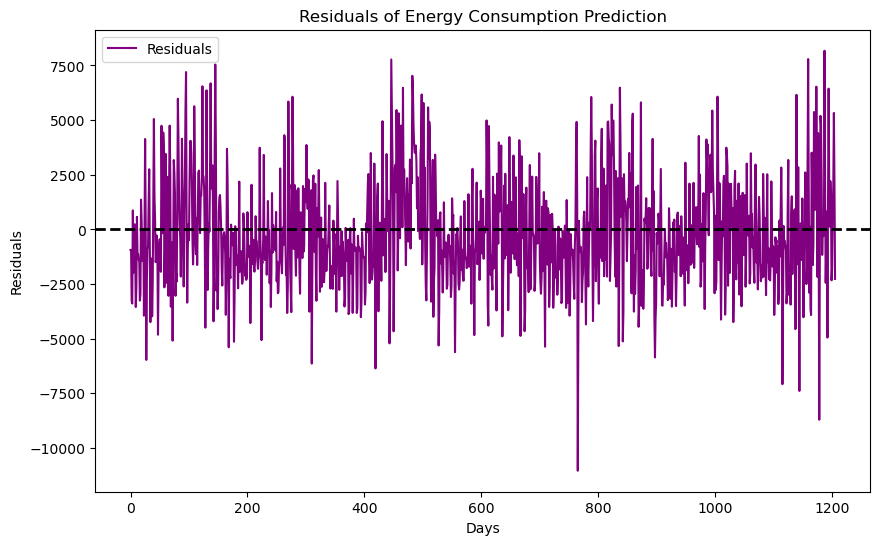

In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('0587b040420ae881cd50f9f0e12a135a/PJME_hourly.csv', index_col='Datetime', parse_dates=True)

# Prepare data for forecasting
df = df[['PJME_MW']].resample('D').mean()

# Data normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30  # Look back 30 days
X, y = create_sequences(data_scaled, seq_length)

# Train/test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the Transformer Model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim=1, num_heads=4, ff_hidden_size=64):
        super(TimeSeriesTransformer, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(input_dim, ff_hidden_size),
            nn.ReLU(),
            nn.Linear(ff_hidden_size, input_dim)
        )
        self.input_projection = nn.Linear(input_dim, input_dim)

    def forward(self, x):
        # Reshape for multi-head attention
        x = x.transpose(0, 1)  # (seq_len, batch_size, input_dim)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output + x  # Residual connection
        x = self.feed_forward(x)
        return x[-1].unsqueeze(0)  # Return last output, add batch dimension

# Instantiate model, loss function, and optimizer
model = TimeSeriesTransformer(input_dim=1, num_heads=1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 150
for i in range(epochs):
    model.train()
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        y_pred = model(seq.unsqueeze(0))  # Add batch dimension
        loss = loss_function(y_pred, labels.unsqueeze(0))  # Add batch dimension to labels
        loss.backward()
        optimizer.step()

    if i % 25 == 0:
        print(f'Epoch {i} Loss: {loss.item()}')

# Testing the model
model.eval()
test_predictions = []
for seq in X_test:
    with torch.no_grad():
        test_predictions.append(model(seq.unsqueeze(0)).item())

# Inverse transform to get actual values
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
true_y_test = scaler.inverse_transform(y_test.detach().numpy())

# Evaluate performance
mae = mean_absolute_error(true_y_test, true_predictions)
mse = mean_squared_error(true_y_test, true_predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(true_y_test, label='True Energy Consumption', color='blue')
plt.plot(true_predictions, label='Predicted Energy Consumption', color='red')
plt.title('Energy Consumption Prediction Using Transformer')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

# Residual Analysis
residuals = true_y_test - true_predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.title('Residuals of Energy Consumption Prediction')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.legend()
plt.show()
